In [92]:
import matplotlib.pyplot as plt 
import numpy as np 


plt.rcParams['figure.dpi'] = 150

In [93]:

def correctFunction(x): 
    return 15 + 2.4*np.sin(x)  


In [94]:
# Create the data
xdata = np.linspace(-10,10,101)
data = np.array([xdata,correctFunction(xdata)])

# Perturbation 
P = np.array(((2*np.random.rand(101))-1))

# Perturbed data 

dataP = np.array([xdata, data[1]+ P ])

The function we try to fit: $ f(x) = \sum_{k=0}^n a_k sin(x)^k$), the error function: $ \Delta = \sum_{i=1}^n \left(y_i-f(x_i)\right)^2 $

In [95]:
def TestModel(x, a):
    t = 0
    for k in range(len(a)):
        t = t + a[k] * np.sin(x)**k
    return t

def errorFit(f, coefficients, data):
    # f: The fit function
    # coefficients: ai that we try to optimize
    # data: The data we try to fit
    error = 0
    for i in range(len(data[0])):
        error = error + ( data[1,i] - f( data[0,i], coefficients ))**2
    return error

def errorFitGradient(f,coefficients,data):
    
    return -2 * np.array([
            np.sum(np.array([(data[1,i] - f(data[0,i], coefficients)) * data[0,i]**k for i in range(len(data[0]))]))
        for k in range(len(coefficients))])

In [96]:
a0 = np.array([15,2.4])

In [97]:
errorFit(,dataP)

19229.125563519516

In [112]:
iterations = 10000
h = 0.00001
a = np.array([1,1])

for i in range(iterations):
    
    a = a  - h * errorFitGradient(TestModel,a, dataP)
    print(errorFit(TestModel,a,dataP))
print(a,i)

19812.345563526844
19732.608744776473
19653.193442641048
19574.09836042498
19495.322206663244
19416.863695100332
19338.721544669213
19260.89447947038
19183.381228751034
19106.1805268843
19029.291113348572
18952.711732706888
18876.44113458643
18800.478073658087
18724.82130961613
18649.469607157906
18574.421735963697
18499.676470676568
18425.232590882413
18351.088881089945
18277.244130710864
18203.6971340401
18130.446690236087
18057.49160330111
17984.830682061864
17912.462740149862
17840.386595982138
17768.60107274193
17697.104998359442
17625.89720549265
17554.976531508324
17484.341818462934
17413.991913083777
17343.925666750165
17274.141935474563
17204.639579884017
17135.417465201426
17066.474461227084
16997.809442320162
16929.42128738034
16861.30887982948
16793.471107593396
16725.90686308368
16658.61504317957
16591.594549209975
16524.8442869355
16458.363166530562
16392.15010256561
16326.204013989376
16260.523824111175
16195.108460583393
16129.956855383867
16065.067944798537
16000.44066

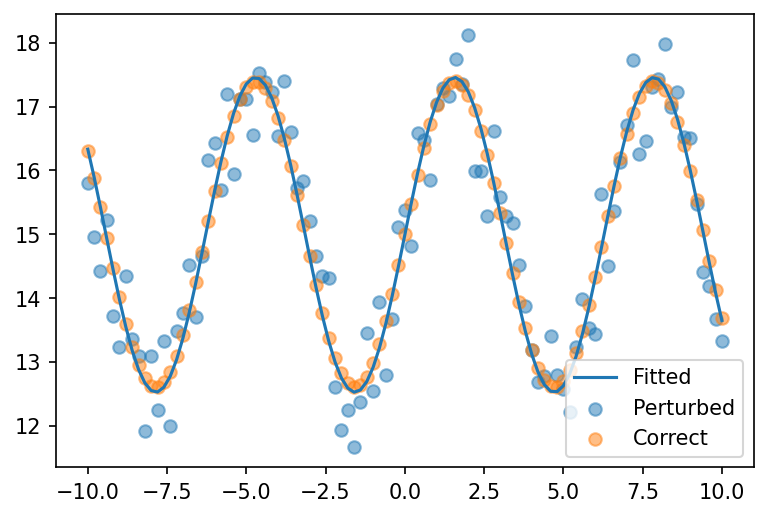

In [113]:
plt.scatter(xdata,dataP[1],label='Perturbed',alpha = 0.5)
plt.scatter(xdata,data[1],label = 'Correct',alpha= 0.5)
plt.plot(xdata,TestModel(xdata,a),label='Fitted')
plt.legend()

In [115]:
print(errorFit(TestModel,a,dataP))
print(errorFit(TestModel,a0,dataP))

34.103501734773296
33.805358711082526
